In [1]:
import pandas
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## 1. pre-process

### 1-1 load data

In [2]:
# load data set
train = pandas.read_csv("./data/train.csv")
test  = pandas.read_csv("./data/test.csv")

In [3]:
train.tail()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0
76019,151838,2,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
test.tail() # no 'TARGET'

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
75813,151831,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40243.200000
75814,151832,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146961.300000
75815,151833,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167299.770000
75816,151834,2,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
75817,151837,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


### 1-2 delete columns

In [5]:
# delete constant columns
con_removed = [] # removed constant columns
df_train = train # copy the train data frame
df_test = test # copy the test data frame

# removed constant columns
for col in df_train.columns:
    if df_train[col].std() == 0:
        con_removed.append(col)

df_train.drop(con_removed, axis=1, inplace=True) # remove constant columns in the train data frame

df_test.drop(con_removed, axis=1, inplace=True) # remove constant columns in the test data frame

print ('removed constand columns: {}'.format(len(con_removed)))
print
print con_removed

removed constand columns: 34

['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']


In [6]:
# delete duplicated columns
dup_removed = [] # removed duplicated columns
col_tmp = [] # temp list for columns scan
dupList = {} # a dictionary of duplicated columns

columns = df_train.columns
for i in range(len(columns)-1):
    v = df_train[columns[i]].values
    dupCols = [] # duplicated columns
    for n in range(i+1, len(columns)): # compare with i and i+1(equal?) 
        if np.array_equal(v, df_train[columns[n]].values):
            dup_removed.append(columns[n])
            if columns[n] not in col_tmp:
                dupCols.append(columns[n])
                dupList[columns[i]] = dupCols
                
print dupList
print
print ('duplicated columns with distinct values: {}'.format(len(dupList)))

df_train.drop(dup_removed, axis=1, inplace=True)
df_test.drop(dup_removed, axis=1, inplace=True)
print
print ('removed duplicated coulumns: {}'.format(len(dup_removed)))

{'delta_imp_reemb_var33_1y3': ['delta_num_reemb_var33_1y3'], 'ind_var18_0': ['ind_var18'], 'delta_imp_reemb_var13_1y3': ['delta_num_reemb_var13_1y3'], 'ind_var26_0': ['ind_var26'], 'ind_var25_0': ['ind_var25'], 'num_var6_0': ['num_var29_0'], 'num_var26_0': ['num_var26'], 'ind_var40': ['ind_var39'], 'ind_var37_0': ['ind_var37'], 'num_var18_0': ['num_var18'], 'delta_imp_trasp_var33_in_1y3': ['delta_num_trasp_var33_in_1y3'], 'saldo_var13_medio': ['saldo_medio_var13_medio_ult1'], 'num_var40': ['num_var39'], 'num_var34_0': ['num_var34'], 'num_var32_0': ['num_var32'], 'ind_var13_medio_0': ['ind_var13_medio'], 'num_var6': ['num_var29'], 'num_var13_medio_0': ['num_var13_medio'], 'ind_var32_0': ['ind_var32'], 'delta_imp_reemb_var17_1y3': ['delta_num_reemb_var17_1y3'], 'delta_imp_trasp_var17_in_1y3': ['delta_num_trasp_var17_in_1y3'], 'saldo_var6': ['saldo_var29'], 'ind_var34_0': ['ind_var34'], 'num_var37_0': ['num_var37'], 'num_var25_0': ['num_var25'], 'ind_var6_0': ['ind_var29_0'], 'delta_imp_t

In [7]:
print dup_removed

['ind_var29_0', 'ind_var29', 'ind_var13_medio', 'ind_var18', 'ind_var26', 'ind_var25', 'ind_var32', 'ind_var34', 'ind_var37', 'ind_var39', 'num_var29_0', 'num_var29', 'num_var13_medio', 'num_var18', 'num_var26', 'num_var25', 'num_var32', 'num_var34', 'num_var37', 'num_var39', 'saldo_var29', 'saldo_medio_var13_medio_ult1', 'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3']


check correlation between dependent variables

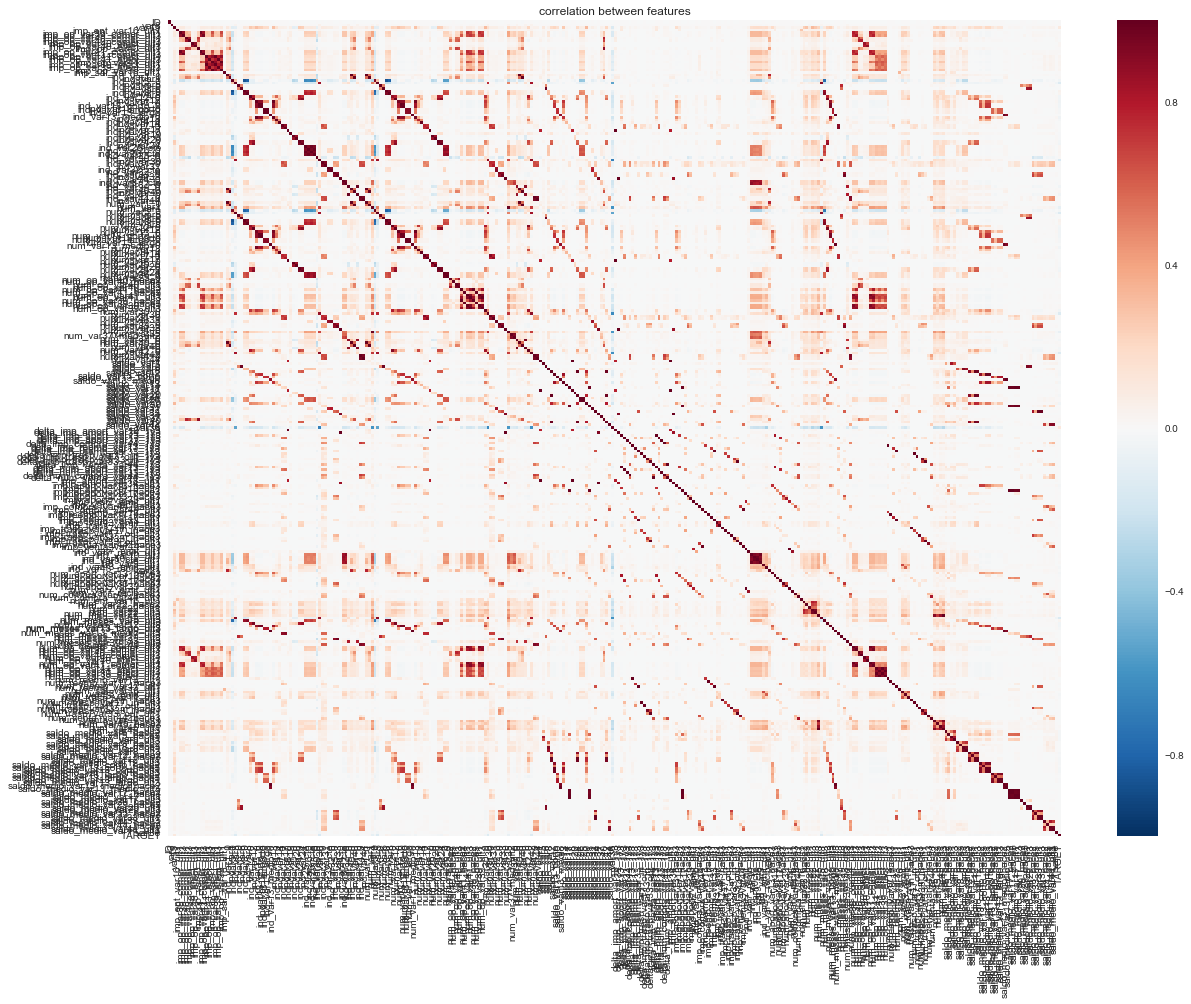

In [13]:
fig = plt.figure(figsize = (20, 15))
corr = df_train.corr()
sns.heatmap(corr)
plt.title("correlation between features")
plt.show()

In [22]:
corr_stack = corr.abs().unstack()
ordered_stack = corr_stack.order(kind="quicksort", ascending=False)
order_idx = []

for num in range(len(ordered_stack)):
    if ordered_stack[num] > 0.8 and ordered_stack[num] < 1:
        order_idx.append(num)

print ordered_stack[min(order_idx):max(order_idx)]

c:\python27\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: order is deprecated, use sort_values(...)
  


delta_num_compra_var44_1y3     delta_imp_compra_var44_1y3       1.000000
delta_imp_compra_var44_1y3     delta_num_compra_var44_1y3       1.000000
ind_var18_0                    delta_imp_amort_var18_1y3        1.000000
delta_imp_amort_var18_1y3      ind_var18_0                      1.000000
num_reemb_var33_ult1           imp_reemb_var33_ult1             1.000000
imp_reemb_var33_ult1           num_reemb_var33_ult1             1.000000
num_trasp_var17_out_ult1       delta_imp_trasp_var17_out_1y3    1.000000
delta_imp_trasp_var17_out_1y3  num_trasp_var17_out_ult1         1.000000
imp_reemb_var17_hace3          num_reemb_var17_hace3            1.000000
num_reemb_var17_hace3          imp_reemb_var17_hace3            1.000000
num_var34_0                    ind_var34_0                      1.000000
ind_var34_0                    num_var34_0                      1.000000
num_trasp_var17_in_ult1        delta_imp_trasp_var17_in_1y3     1.000000
delta_imp_trasp_var17_in_1y3   num_trasp_var17_in_u

## 1.5 Make Train and Test Set

In [43]:
# make train data set
x_train = df_train.drop(['ID', 'TARGET'], axis=1)
y_train = df_train['TARGET']

# make test data set
id_test = df_test['ID']
x_test = df_test.drop(['ID'], axis=1)

print ('Train data set size: {}'.format(x_train.shape))
print ('Test data set size: {}'.format(x_test.shape))

Train data set size: (76020, 306)
Test data set size: (75818, 306)


## 2. Data Analysis

### 2.1 log

## 2.1 PCA